# Bike Sharing  Data Analysis Project


---



*   Nama : Ahmad Radesta
*   Email : ahmadradesta95@gmail.com








# Pertanyaan Bisnis

1.   Bagaimana *trend* penggunaan *bike sharing* setiap tahun?
2.   Bagaimana pengaruh kondisi cuaca terhadap jumlah rata-rata *bike sharing*?
3.   Bagaimana pengaruh musim terhadap jumlah pengguna sepeda?
4.   Pada jam berapa jumlah peminjaman sepeda paling tinggi?

# Setup Environment

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("lakshmi25npathi/bike-sharing-dataset")

print("Path to dataset files:", path)

100%|██████████| 286k/286k [00:00<00:00, 52.3MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/lakshmi25npathi/bike-sharing-dataset/versions/1


# Data wrangling


**Data gathering**

In [ ]:
days_df = pd.read_csv("/root/.cache/kagglehub/datasets/lakshmi25npathi/bike-sharing-dataset/versions/1/day.csv")
days_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
hours_df = pd.read_csv("/root/.cache/kagglehub/datasets/lakshmi25npathi/bike-sharing-dataset/versions/1/hour.csv")
hours_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Assessing Data**

In [ ]:
days_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Terdapat keanehan Tipe data dteday, yang dimana seharusnya bernilai *datetime* bukan bernilai *object*

In [ ]:
days_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [ ]:
hours_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


tipe data pada *dteday* bukan *object* melainkan *datetime*

In [ ]:
hours_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Data Cleaning**

In [ ]:
days_df["dteday"] = pd.to_datetime(days_df["dteday"])
hours_df['dteday'] = pd.to_datetime(hours_df['dteday'])

Mengubah tipe data *dteday* pada data *days_df* dan *hours_df* dari object menjadi datetime

In [ ]:
days_df.rename(columns={
    "dteday": "date",
    "yr": "year",
    "mnth": "month",
    "cnt": "total_count"
}, inplace=True)

In [ ]:
hours_df.rename(columns={
    "dteday": "date",
    "yr": "year",
    "mnth": "month",
    "hr": "hour",
    "cnt": "total_count"
}, inplace=True)

Mengubah nama kolom menjadi nama yang mudah dimengerti oleh pengguna

# Exploratory Data Analysis (EDA)

In [ ]:
days_df.describe(include="all")

,instant,date,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,total_count
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


Dari tabel di atas, dapat diketahui bahwa rata-rata jumlah pengguna harian selama tahun 2011–2012 sekitar 4.504 pengguna, dengan jumlah terendah 22 pengguna dan tertinggi mencapai 8.714 pengguna.

In [ ]:
days_df["year"] = days_df["year"].replace({0: 2011, 1: 2012})
days_df.groupby(by='year').total_count.sum()


,total_count
year,
2011,1243103
2012,2049576


pengguna sepeda meningkat di tahun 2012

In [ ]:
days_df["season"] = days_df["season"].replace({
    1: "Spring",
    2: "Summer",
    3: "Fall",
    4: "Winter"
})


In [ ]:
days_df.groupby(by='season').agg({
    "casual": ["max", "min", "mean", "sum"],
    "registered": ["max", "min", "mean", "sum"],
    "total_count": ["max", "min", "mean", "sum"]
})

casual                           registered                            \
          max  min         mean     sum        max  min         mean     sum   
season                                                                         
Fall     3160  118  1202.611702  226091       6917  889  4441.691489  835038   
Spring   3155    9   334.928177   60622       5315  416  2269.204420  410726   
Summer   3410  120  1106.097826  203522       6456  674  3886.233696  715067   
Winter   3031    2   729.112360  129782       6946   20  3999.050562  711831   

       total_count                              
               max   min         mean      sum  
season                                          
Fall          8714  1115  5644.303191  1061129  
Spring        7836   431  2604.132597   471348  
Summer        8362   795  4992.331522   918589  
Winter        8555    22  4728.162921   841613

Berdasarkan hasil tersebut, jumlah penyewaan sepeda tertinggi terjadi pada musim gugur (Fall), sedangkan penyewaan terendah terjadi pada musim dingin (Winter).

In [ ]:
days_df["weekday"] = days_df["weekday"].replace({
    0: "Sunday",
    1: "Monday",
    2: "Tuesday",
    3: "Wednesday",
    4: "Thursday",
    5: "Friday",
    6: "Saturday"
})



In [ ]:
days_df.groupby("weekday").agg({
    "casual": ["max", "min", "mean", "sum"],
    "registered": ["max", "min", "mean", "sum"],
     'total_count':['max','min','mean']
}).reindex(["Sunday","Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"])



casual                          registered                     \
             max min         mean     sum        max   min         mean   
weekday                                                                   
Sunday      3283  54  1338.295238  140521       5657   451  2890.533333   
Monday      3065   2   674.133333   70784       6435    20  3663.990476   
Tuesday     1348   9   556.182692   57843       6697   573  3954.480769   
Wednesday   2562   9   551.144231   57319       6946   432  3997.394231   
Thursday    1405  15   590.961538   61460       6781   416  4076.298077   
Friday      2469  38   752.288462   78238       6917  1129  3938.000000   
Saturday    3410  57  1465.257143  153852       5966   570  3085.285714   

                  total_count                     
              sum         max   min         mean  
weekday                                           
Sunday     303506        8227   605  4228.828571  
Monday     384719        7525    22  4338.123810  
Tuesday    411266        7767   683  4510.663462  
Wednesday  415729        8173   441  4548.538462  
Thursday   423935        7804   431  4667.259615  
Friday     409552        8362  1167  4690.288462  
Saturday   323955        8714   627  4550.542857

 Penyewaan sepeda meningkat signifikan pada akhir pekan, terutama dari pengguna casual, yang kemungkinan besar menggunakan sepeda untuk rekreasi. Sementara itu, pada hari kerja, mayoritas penyewa berasal dari pengguna registered, yang cenderung menggunakan sepeda untuk keperluan transportasi rutin.

In [ ]:
hours_df.describe(include="all")

,instant,date,season,year,month,hour,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,total_count
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


In [ ]:
hours_df.groupby("hour")["total_count"].mean().sort_values(ascending=False)

,total_count
hour,
17,461.452055
18,425.510989
8,359.011004
16,311.983562
19,311.523352
13,253.661180
12,253.315934
15,251.233196
14,240.949246


 Ada jam-jam tertentu dengan lonjakan besar peminjaman yaitu, pada jam 17.00-18.00

In [ ]:
hours_df["workingday"] = hours_df["workingday"].map({0: "Weekend", 1: "Weekday"})
hours_df.groupby("workingday")["total_count"].mean()


,total_count
workingday,
Weekday,193.207754
Weekend,181.405332


Sebagian besar data berasal dari hari kerja, sehingga tren peminjaman lebih mencerminkan rutinitas harian

# Data Visualization

In [ ]:
hours_df['bln'] = hours_df['date'].dt.strftime('%b')
hours_df['bln'] = pd.Categorical(hours_df['bln'],
                               ordered=True,
                               categories=['Jan',
                                           'Feb',
                                           'Mar',
                                           'Apr',
                                           'May',
                                           'Jun',
                                           'Jul',
                                           'Aug',
                                           'Sep',
                                           'Oct',
                                           'Nov',
                                           'Dec'])

In [ ]:

bike = hours_df[['year', 'total_count', 'bln']]
bike2011 = bike.loc[bike['year'] == 0]
bike2011 = bike2011[['bln', 'total_count']].groupby('bln', observed=False).sum().reset_index()

bike2012 = bike.loc[bike['year'] == 1]
bike2012 = bike2012[['bln', 'total_count']].groupby('bln', observed=False).sum().reset_index()

**Viualization 1: Trend Penggunaan Bike Sharing**

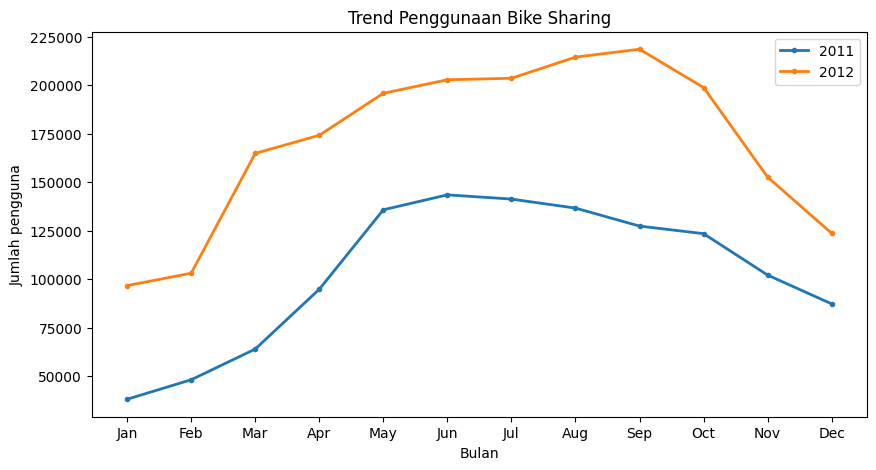

In [ ]:

plt.figure(figsize = (10,5))

plt.plot(
    bike2011['bln'],
    bike2011['total_count'],
    label='2011',
    marker=".",
    linewidth=2,
)

plt.plot(
    bike2012['bln'],
    bike2012['total_count'],
    label='2012',
    marker=".",
    linewidth=2,
)

plt.xlabel('Bulan')
plt.ylabel('Jumlah pengguna')
plt.title('Trend Penggunaan Bike Sharing')
plt.legend()
plt.show()

Penggunaan bike-sharing meningkat drastis dari 2011 ke 2012, dengan lonjakan terbesar pada Maret-Mei 2011 dan Februari 2012, kemungkinan dipengaruhi oleh acara musiman. Sebaliknya, terjadi penurunan pengguna pada Oktober-Desember, kemungkinan akibat musim dingin.

**Visualization 3: Distribusi Pengguna Bike Sharing Berdasarkan Musim**

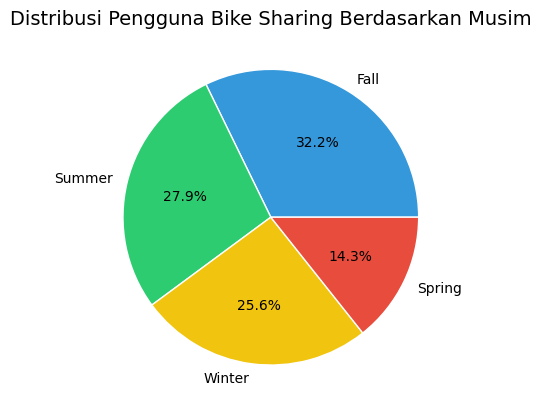

In [ ]:

def musim(x):
  if x == 1:
    return 'Spring'
  elif x == 2:
    return 'Summer'
  elif x == 3:
    return 'Fall'
  else:
    return 'Winter'

hours_df['musim'] = hours_df['season'].apply(musim)
season = hours_df[['musim', 'total_count']].groupby('musim').sum().sort_values(by='total_count', ascending=False).reset_index()

colors = ['#3498db', '#2ecc71', '#f1c40f', '#e74c3c']
plt.title("Distribusi Pengguna Bike Sharing Berdasarkan Musim", fontsize=14)

plt.pie(
    season['total_count'],
    labels=season['musim'],
    autopct='%1.1f%%',
    colors=colors,
    wedgeprops={'edgecolor': 'white'}
)

plt.show()



Musim gugur (fall) memiliki persentase pengguna tertinggi, yaitu sekitar 32.2%, sedangkan musim semi (spring) memiliki jumlah pengguna paling sedikit, hanya 14.3%. Musim panas (summer) dan musim dingin (winter) juga memiliki jumlah pengguna yang cukup tinggi, masing-masing 27.9% dan 25.6%.

**Visualization 4: Preferensi pengguna Berdasarkan Keadaan Cuaca**

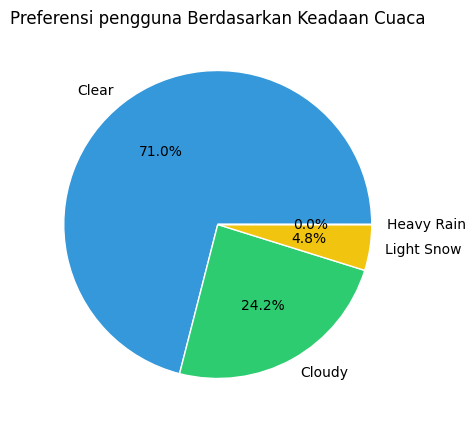

In [ ]:
def cuaca(x):
  if x == 1:
    return 'Clear'
  elif x == 2:
    return 'Cloudy'
  elif x == 3:
    return 'Light Snow'
  else:
    return 'Heavy Rain'

hours_df['cuaca'] = hours_df['weathersit'].apply(cuaca)

weather = hours_df[['cuaca', 'total_count']].groupby('cuaca').sum().sort_values(by='total_count', ascending=False).reset_index()

plt.figure(figsize = (10, 5))
plt.title("Preferensi pengguna Berdasarkan Keadaan Cuaca")
colors = ['#3498db', '#2ecc71', '#f1c40f', '#e74c3c']

plt.pie(
    weather['total_count'],
    labels=weather['cuaca'],
    autopct= '%1.1f%%',
    colors = colors,
    wedgeprops={'edgecolor': 'white'}
)

plt.show()


 Sebagian besar pengguna bike-sharing lebih memilih bersepeda saat cuaca cerah (Clear) dengan persentase 71.0%. Sementara itu, 24.2% pengguna masih menggunakan layanan ini saat cuaca berawan (Cloudy). Namun, penggunaan sepeda menurun drastis saat terjadi salju ringan (Light Snow) dengan hanya 4.8%, dan hampir tidak ada pengguna saat hujan lebat (Heavy Rain).

**Viusalization 5: Tingkat Penggunaan Bike Sharing Berdasarkan Waktu**

<Figure size 1000x500 with 0 Axes>

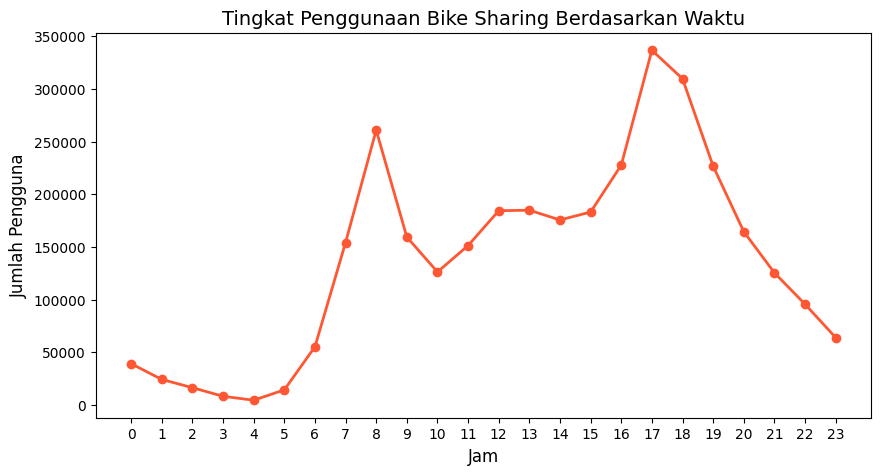

In [ ]:
hours_df['musim'] = hours_df['season'].apply(musim)

user_hour = hours_df[['season', 'hour', 'total_count']]
user_hour = user_hour[['hour', 'season', 'total_count']].groupby('hour').sum().reset_index()

fig = plt.figure(figsize=(10, 5))

plt.figure(figsize=(10, 5))

plt.plot(
    user_hour['hour'],
    user_hour['total_count'],
    marker="o",
    linestyle="-",
    linewidth=2,
    color="#FF5733",
)

plt.ylabel('Jumlah Pengguna', fontsize=12)
plt.xlabel('Jam', fontsize=12)
plt.title('Tingkat Penggunaan Bike Sharing Berdasarkan Waktu', fontsize=14)

plt.xticks(ticks=range(0, 24), labels=range(0, 24))  # Menjaga keterbacaan sumbu x

plt.show()




Penggunaan bike-sharing mencapai puncaknya pada pukul 08.00 dan 17.00-18.00. Tren ini menunjukkan pola yang khas dari aktivitas komuter, di mana banyak orang menggunakan sepeda untuk pergi dan pulang kerja.

# Conclusion

---

# 1. Bagaimana trend penggunaan bike sharing setiap tahun?


*   Penggunaan bike-sharing meningkat drastis dari 2011 ke 2012, dengan lonjakan terbesar pada Maret-Mei 2011 dan Februari 2012, kemungkinan dipengaruhi oleh acara musiman. Sebaliknya, terjadi penurunan pengguna pada Oktober-Desember, kemungkinan akibat musim dingin


#2. Bagaimana pengaruh kondisi cuaca terhadap jumlah rata-rata bike sharing?
*   Mayoritas pengguna bike-sharing lebih memilih menggunakan sepeda saat cuaca cerah (71% penggunaan terjadi saat cuaca "Clear"). Saat cuaca mendung (Cloudy, 24.2%), penggunaan sedikit menurun, tetapi masih cukup tinggi. Penggunaan sepeda turun drastis dalam kondisi hujan deras atau salju, hampir 0% pengguna menggunakan sepeda dalam kondisi "Heavy Rain", dan hanya sekitar 4.8% dalam kondisi "Light Snow".

#3. Bagaimana pengaruh musim terhadap jumlah pengguna sepeda?
*   Penggunaan bike-sharing bervariasi tergantung musim. Musim gugur (Fall) memiliki jumlah pengguna tertinggi (32.2%), diikuti oleh musim panas (Summer, 27.9%) dan musim dingin (Winter, 25.6%). Penggunaan sepeda paling rendah terjadi pada musim semi (Spring, 14.3%), yang kemungkinan disebabkan oleh cuaca yang kurang mendukung atau curah hujan yang lebih tinggi.

#4. Pada jam berapa jumlah peminjaman sepeda paling tinggi?
*  Peminjaman sepeda mencapai puncaknya pada pukul 08.00 dan 17.00-18.00, yang mencerminkan pola perjalanan komuter—banyak orang menggunakan sepeda untuk pergi ke kantor atau pulang kerja. Sebaliknya, penggunaan sepeda paling rendah terjadi pada dini hari (00.00 - 05.00), yang kemungkinan karena aktivitas luar rumah sangat minim pada jam tersebut.

In [ ]:
pip freeze > requirements.txt

In [ ]:
hours_df.to_csv("all_data.csv", index=False)